In [1]:
#!pip install umap-learn -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("../../data/scRNASeq_counts_pbmc_preped.csv", index_col=0)

df = df.apply(lambda x: x*1000000 / x.sum(), axis=1)
df = np.log1p(df)

df.head()

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
CellID,,,,,,,,,,,,,,,,,,,,,
TTATGGCTTATGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.797490,6.476864,0.0,7.035820,0.0,0.0,0.0,0.0,0.0
TAGCCCTGCGGAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.273522,0.000000,0.0,9.857440,0.0,0.0,0.0,0.0,0.0
TCTAAGCTAATGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.086125,7.086125,0.0,7.086125,0.0,0.0,0.0,0.0,0.0
ATAATGACCTACTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.116068,6.116068,0.0,6.808111,0.0,0.0,0.0,0.0,0.0
CGACCACTGCCAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.902918,6.294958,0.0,9.471241,0.0,0.0,0.0,0.0,0.0


In [3]:
cluster_df = pd.read_csv("../../data/scRNASeq_cluster_pbmc_preped.csv", index_col=0)
cluster_df.head()

,cluster
CellID,
AAACATACAACCAC-1,CD4 T
AAACATTGAGCTAC-1,B
AAACATTGATCAGC-1,CD4 T
AAACCGTGCTTCCG-1,FCGR3A+ Monocytes
AAACCGTGTATGCG-1,NK


In [8]:
umap_feature = umap.UMAP(n_neighbors=5, metric='correlation', random_state=17).fit_transform(df)
umap_feature = pd.DataFrame(umap_feature, columns=['UMAP1', 'UMAP2'], index=df.index)
umap_feature = umap_feature.merge(cluster_df, left_index=True, right_index=True)
umap_feature

/Users/yokoda/.miniforge3_x86-64/envs/colab/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP1,UMAP2,cluster
CellID,,,
TTATGGCTTATGGC-1,-2.733880,12.007904,Dendritic
TAGCCCTGCGGAGA-1,7.746023,10.002529,CD8 T
TCTAAGCTAATGCC-1,9.058283,11.236224,CD4 T
ATAATGACCTACTT-1,8.747865,9.999228,CD4 T
CGACCACTGCCAAT-1,9.227801,7.989398,NK
...,...,...,...
ACGTCGCTTCTCAT-1,6.851936,1.915862,B
GAGTTGTGGTAGCT-1,-5.740953,11.472754,Megakaryocytes
CTCATTGATGCTTT-1,-4.882013,13.014646,CD14+ Monocytes


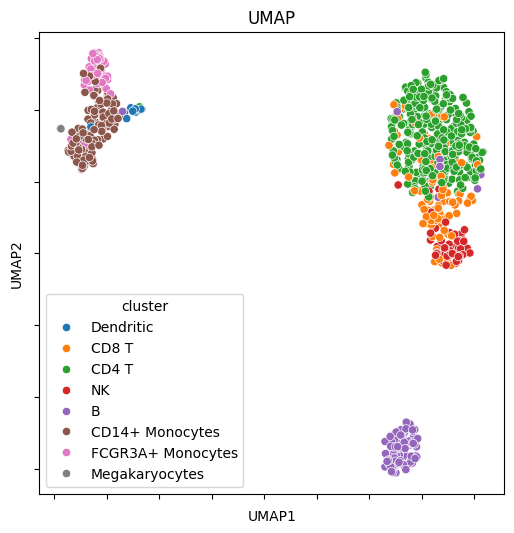

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=umap_feature, x='UMAP1', y='UMAP2', hue='cluster', ax=ax)

ax.set_title('UMAP')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [6]:
tsne_feature = TSNE(n_components=2, perplexity=30, metric='correlation').fit_transform(df)
tsne_feature = pd.DataFrame(tsne_feature, columns=['tSNE1', 'tSNE2'], index=df.index)
tsne_feature = tsne_feature.merge(cluster_df, left_index=True, right_index=True)
tsne_feature

,tSNE1,tSNE2,cluster
CellID,,,
TTATGGCTTATGGC-1,-4.011349,-22.296343,Dendritic
TAGCCCTGCGGAGA-1,6.244618,4.468932,CD8 T
TCTAAGCTAATGCC-1,4.058756,4.318819,CD4 T
ATAATGACCTACTT-1,4.163268,0.390962,CD4 T
CGACCACTGCCAAT-1,9.220757,-3.234117,NK
...,...,...,...
ACGTCGCTTCTCAT-1,-13.506651,6.365253,B
GAGTTGTGGTAGCT-1,-1.227272,-24.131218,Megakaryocytes
CTCATTGATGCTTT-1,-7.732212,-24.257233,CD14+ Monocytes


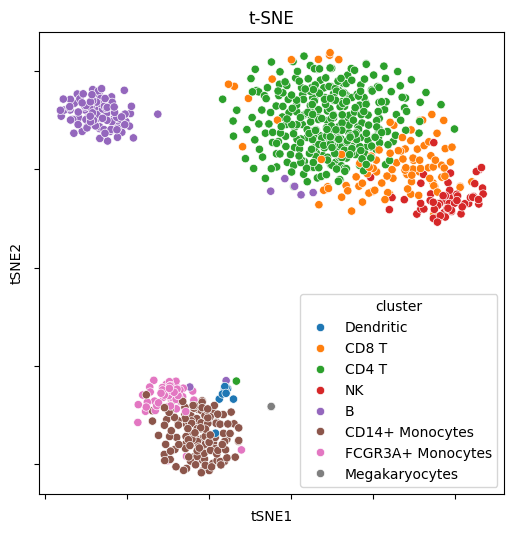

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=tsne_feature, x='tSNE1', y='tSNE2', hue='cluster', ax=ax)

ax.set_title('t-SNE')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [12]:
plot_df = df[["IL7R"]].copy()
plot_df = plot_df.merge(cluster_df, left_index=True, right_index=True)
plot_df

,IL7R,cluster
CellID,,
TTATGGCTTATGGC-1,0.000000,Dendritic
TAGCCCTGCGGAGA-1,0.000000,CD8 T
TCTAAGCTAATGCC-1,0.000000,CD4 T
ATAATGACCTACTT-1,6.116068,CD4 T
CGACCACTGCCAAT-1,0.000000,NK
...,...,...
ACGTCGCTTCTCAT-1,0.000000,B
GAGTTGTGGTAGCT-1,6.032607,Megakaryocytes
CTCATTGATGCTTT-1,0.000000,CD14+ Monocytes


/var/folders/nb/ks79gh_s30z8f_b8z00ks12w0000gn/T/ipykernel_97835/261197223.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


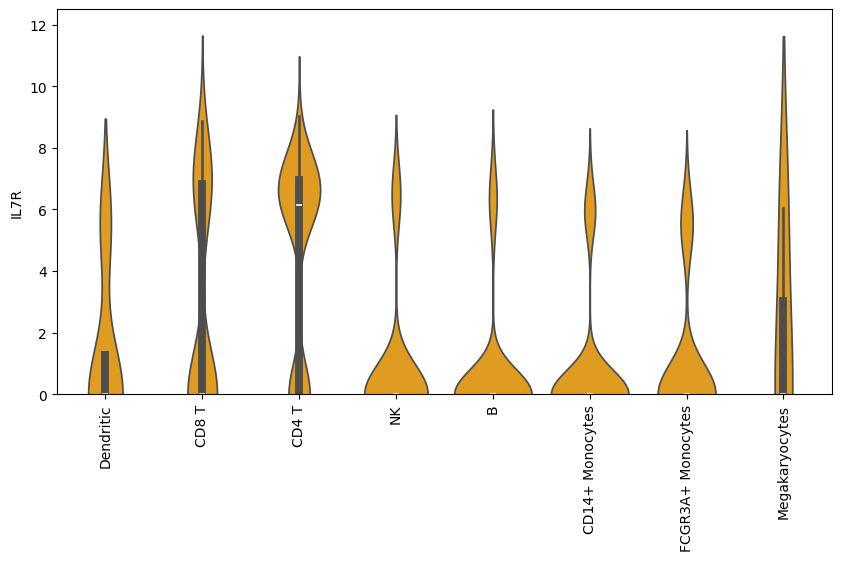

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.violinplot(data=plot_df, x='cluster', y='IL7R', color='orange')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylim(0, 12.5)
plt.show()